# Cervical Cancer Prediction: PCA
**CC3084 DATA SCIENCE - LAB 1**
> Samuel A. Chamalé, `cha21881@uvg.edu.gt`

> Adrian Rodriguez, `rod21691@uvg.edu.gt`
---

## Principal Components Analysis [8]

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./archive/cleaned_cervical_cancer_data.csv')

Using continuous vars exclusively, as we found previously using earlier that excluding binary variables have no impact over this process...

In [6]:
continuous_vars = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
                   'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)']

continuous_data = df[continuous_vars]


### Studying the correlation matrix

First, we need to standardize the continuous variables and then compute the correlation matrix...

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(continuous_data)

correlation_matrix = pd.DataFrame(scaled_data, columns=continuous_vars).corr()
print(correlation_matrix)

                                      Age  Number of sexual partners  \
Age                              1.000000                   0.086533   
Number of sexual partners        0.086533                   1.000000   
First sexual intercourse         0.372709                  -0.150872   
Num of pregnancies               0.562229                   0.098446   
Smokes (years)                   0.225829                   0.157667   
Smokes (packs/year)              0.119631                   0.164829   
Hormonal Contraceptives (years)  0.292857                   0.027334   
IUD (years)                      0.206688                   0.008065   

                                 First sexual intercourse  Num of pregnancies  \
Age                                              0.372709            0.562229   
Number of sexual partners                       -0.150872            0.098446   
First sexual intercourse                         1.000000           -0.070213   
Num of pregnancies         

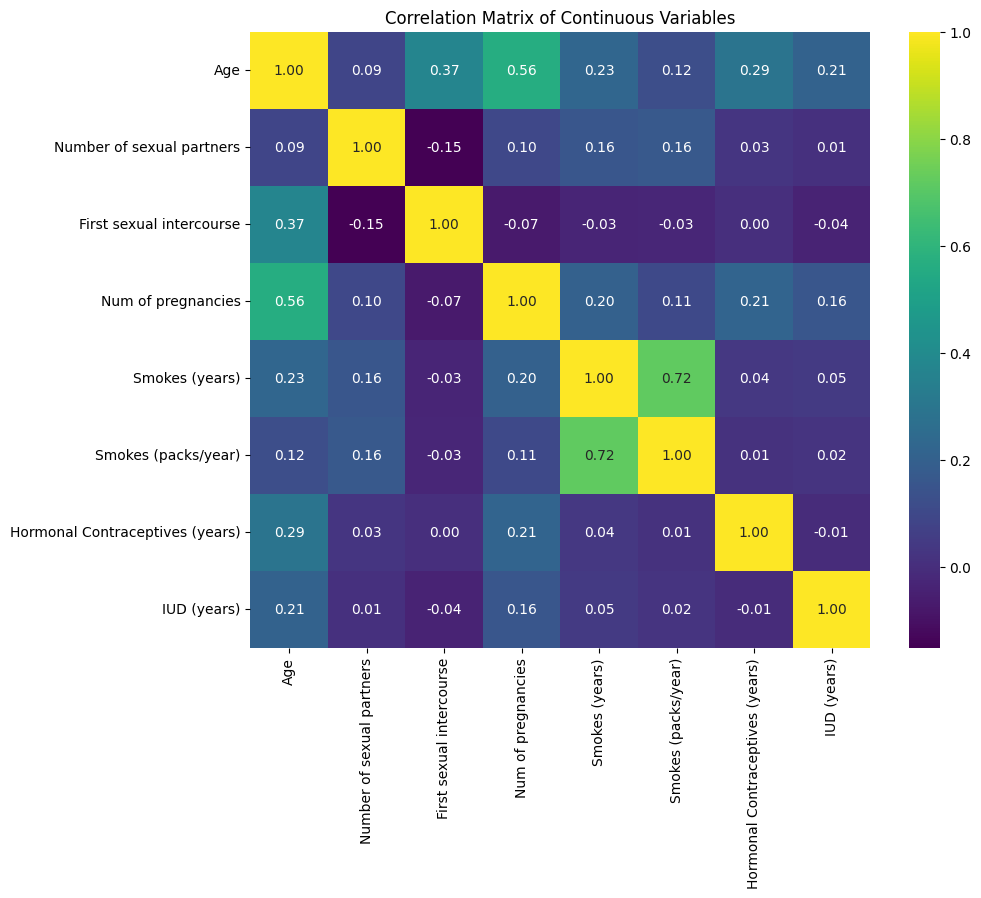

In [14]:
correlation_matrix = pd.DataFrame(scaled_data, columns=continuous_vars).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix of Continuous Variables")
plt.show()

#### Comments:

- We found that Age has a moderate positive correlations with **Number of pregnancies** (0.56) and **First sexual intercourse** (0.37).
- Interestingly the **Number of sexual partners** have mostly low correlations with other variables.
- **First sexual intercourse** has correlation with **Age**.
- **Smokes (years)** and **Smokes (packs/year)** are highly correlated (0.72), indicating that they measure similar aspects of smoking behavior.

### Determine Suitability for Factor Analysis

We can use the KMO index and Bartlett's test of sphericity to determine if PCA is appropriate



In [8]:
# Bartlett's test of sphericity
bartlett_test, bartlett_p_value = calculate_bartlett_sphericity(scaled_data)
print(f"Bartlett's test of sphericity: Chi-Square = {bartlett_test}, p-value = {bartlett_p_value}")

# KMO index
kmo_all, kmo_model = calculate_kmo(scaled_data)
print(f"KMO index: {kmo_model}")

Bartlett's test of sphericity: Chi-Square = 1144.5045095704954, p-value = 3.4540022831362845e-223
KMO index: 0.4849063817362441


#### Comments:

The very low p-value indicates that the variables are significantly correlated, justifying the use of PCA.

On the other hand, the KMO value does not support PCA; we have a value of 0.48, while a value of 0.6 is considered acceptable for PCA. However, since the Bartlett test is significant, PCA can still provide information, but should be interpreted with caution.

### Perform PCA

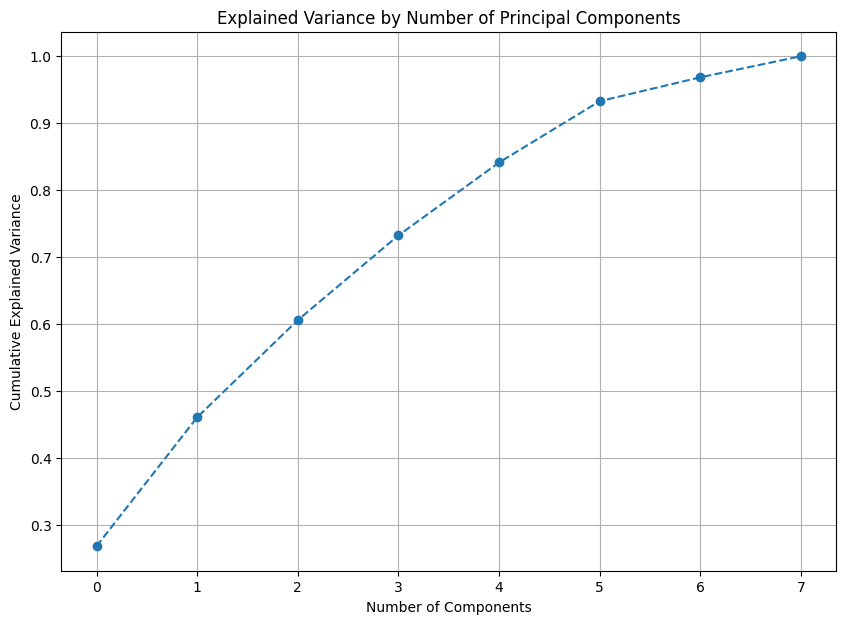

Number of components explaining at least 95% variance: 7


In [9]:
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Plot the explained variance
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid()
plt.show()

# Number of components explaining at least 95% variance
num_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components explaining at least 95% variance: {num_components}")

#### Comments:

- The explained variance plot indicates that **PC1** explains about $30$% of the variance.
- **PC2** explains an additional $20$%, bringing the cumulative explained variance to $50$%.
- The first 4 components explain around $80$% of the variance.

🥁 Finally this suggest that using the first 4 principal components captures the most of the information in the data.

### PCA Loadings

In [10]:
# Get the principal components
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(num_components)])

# Loadings (contribution of each variable to the components)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(num_components)], index=continuous_vars)

# Print the loadings
print(loadings)

                                      PC1       PC2       PC3       PC4  \
Age                              0.492893 -0.441651  0.098887  0.017903   
Number of sexual partners        0.201764  0.239281 -0.390243 -0.204146   
First sexual intercourse         0.077030 -0.374317  0.714499  0.019887   
Num of pregnancies               0.448254 -0.275972 -0.315138  0.003432   
Smokes (years)                   0.487889  0.423011  0.213688  0.031462   
Smokes (packs/year)              0.431876  0.490483  0.250995  0.016287   
Hormonal Contraceptives (years)  0.233700 -0.296469 -0.205760 -0.565058   
IUD (years)                      0.174108 -0.154949 -0.277693  0.798155   

                                      PC5       PC6       PC7  
Age                              0.166238  0.098648 -0.419201  
Number of sexual partners        0.807733 -0.217786  0.041869  
First sexual intercourse         0.345083 -0.179551  0.266332  
Num of pregnancies              -0.074380  0.596499  0.383901  
Smok

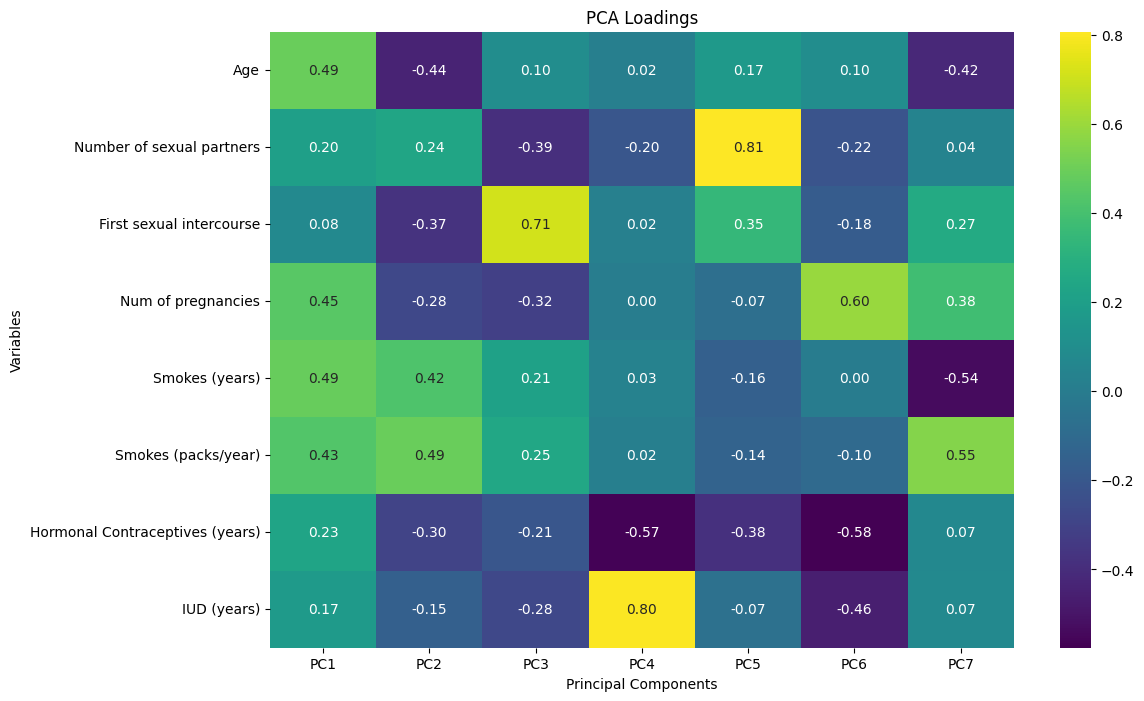

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='viridis', fmt=".2f")
plt.title("PCA Loadings")
plt.xlabel("Principal Components")
plt.ylabel("Variables")
plt.show()

#### Comments:

- **PC1 (30% variance)**: Strongly influenced by Age, Smokes (years), and Smokes (packs/year). This component seems to capture a general health or lifestyle factor.
- **PC2 (20% variance)**: Influenced by Number of sexual partners and Smokes (packs/year). This might represent a social or behavioral component.
- **PC3 (10% variance)**: Dominated by First sexual intercourse. This component may be related to sexual health or behavior.
- **PC4 (10% variance)**: Influenced by IUD (years) and negatively by Hormonal Contraceptives (years). This could represent a contraceptive use component.

But, how each should be interpreted? This is what we found...

- **PC1**: General health/lifestyle factor - High values indicate older age and longer smoking duration/intensity.
- **PC2**: Social/behavioral factor - High values indicate a higher number of sexual partners and higher smoking intensity.
- **PC3**: Sexual health/behavior factor - High values indicate older age at first sexual intercourse.
- **PC4**: Contraceptive use factor - High values indicate longer IUD use and shorter hormonal contraceptive use.